The data was taken found online using the references provided. I have converted any picture of tables to excel files using screenshots and verified them. 
The data used is from 2019. It is cleaned and standardized so that each dataset has required population/rates for each age group, per country (Uganda and USA).

I am assuming that the provided table of age specific death rates are per 100,000, although it is not explicity stated.
Under this assumption, Crude and all other rates are calculated per 100,000.

Crude death rates of each country = $\frac{\Sigma\text{ age specific death rate} \times \text{WHO age group population estimate}} {\text{Total WHO population estimate for each age group}}$

Using Using [Population Pyramid USA](https://www.populationpyramid.net/united-states-of-america/2019/) and [Population Pyramid Uganda](https://www.populationpyramid.net/uganda/2019/), 

You can see that the population distributions are wildly different. Neither of the World, Segi or European distributions resemble either country.
While I have calculated and plotted all 3 age standardised rates, I recommend and have submitted the SEGI rate as the final rate, due to its use in comparing diseases in populations.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [213]:
# import data
## data gathered from online sources - converted screenshots to excel files
pop_estimate = pd.read_excel('pop estimates.xlsx', skiprows=16)
age_std_rates = pd.read_excel('WHO_age.xlsx')
age_std_rates.set_index('Age group', inplace=True)
segi_std = age_std_rates['Segi ("world") standard']
europe_std = age_std_rates['Scandinavian ("European") standard']
world_std = age_std_rates['WHO World Standard*']
copd_rates = pd.read_excel('COPD.xlsx')
copd_rates.set_index('Age group (years)',inplace=True)
copd_rates.rename(columns = 
                    {'Death rate, United States, 2019': 'USA', 'Death rate, Uganda, 2019':'Uganda'}, inplace = True)


In [214]:
# Extracting only age data for US and Uganda, in 2019
pop_estimate = pop_estimate[(pop_estimate['Year']==2019)]
pop_estimate = pop_estimate[(pop_estimate['Region, subregion, country or area *']=='Uganda') | (pop_estimate['Region, subregion, country or area *']=='United States of America')]
pop_estimate = pop_estimate.iloc[:, [2] + list(range(11, len(pop_estimate.columns)))]
# combining 85+ column
pop_estimate['85+'] = pop_estimate['85-89'] + pop_estimate['90-94'] + pop_estimate['95-99'] + pop_estimate['100+']
pop_estimate = pop_estimate.drop(columns=['85-89', '90-94', '95-99', '100+'])
pop_estimate.head()
# melting data to have age specific population for each country
pop_estimate_melted = pop_estimate.melt(var_name='Age', value_name='Population', id_vars='Region, subregion, country or area *')
pop_estimate_pivot = pop_estimate_melted.pivot(index='Age', columns='Region, subregion, country or area *')
pop_estimate_pivot.reset_index(inplace=True)
pop_estimate_pivot.columns.name = None
pop_estimate_pivot.columns = ['Age', 'Uganda', 'USA']
# for consistency
pop_estimate = pop_estimate_pivot[['Age', 'USA', 'Uganda']]
pop_estimate.set_index('Age', inplace=True)
pop_estimate[['USA', 'Uganda']] = pop_estimate[['USA', 'Uganda']].astype(float)




/var/folders/wm/p_fdrppn6vdc156547mypxf00000gn/T/ipykernel_97856/930980110.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_estimate[['USA', 'Uganda']] = pop_estimate[['USA', 'Uganda']].astype(float)


Crude death rates

In [239]:
# total populations in 1000s
total_pop_uganda = pop_estimate['Uganda'].sum()
total_pop_usa = pop_estimate['USA'].sum()

In [235]:
# deaths_by_age = age_std_rates * pop_estimate
deaths_by_age_US = copd_rates['USA'] * pop_estimate['USA']
deaths_by_age_UG = copd_rates['Uganda'] * pop_estimate['Uganda']

# No need to adjust scale, the population data is in 1000s, but this is a [rate(presumably per 100000)*pop]/pop where the pop scale cancels out
crude_death_rate_US = deaths_by_age_US.sum() / total_pop_usa
crude_death_rate_UG = deaths_by_age_UG.sum() / total_pop_uganda


Age specific death rates

In [246]:
# SEGI standard
copd_rates['US SEGI standardized'] = segi_std*copd_rates['USA']
copd_rates['UG SEGI standardized'] = segi_std*copd_rates['Uganda']
# pop*100 because population data was in 1000s and we want rate per 100,000
US_segi_std_death_rate = copd_rates['US SEGI standardized'].sum()/total_pop_usa*100
UG_segi_std_death_rate = copd_rates['UG SEGI standardized'].sum()/total_pop_uganda*100
# WHO standard
copd_rates['US WHO standardized'] = world_std*copd_rates['USA']
copd_rates['UG WHO standardized'] = world_std*copd_rates['Uganda']
US_who_std_death_rate = copd_rates['US WHO standardized'].sum()/total_pop_usa*100
UG_who_std_death_rate = copd_rates['UG WHO standardized'].sum()/total_pop_uganda*100
# Scandinavian/European standard
copd_rates['US European standardized'] = europe_std*copd_rates['USA']
copd_rates['UG European standardized'] = europe_std*copd_rates['Uganda']
US_euro_std_death_rate = copd_rates['US European standardized'].sum()/total_pop_usa*100
UG_euro_std_death_rate = copd_rates['UG European standardized'].sum()/total_pop_uganda*100

In [224]:
copd_rates

,USA,Uganda,US SEGI standardized,UG SEGI standardized,US WHO standardized,UG WHO standardized,US European standardized,UG European standardized
Age group (years),,,,,,,,
0-4,0.04,0.40,0.480,4.800,0.3544,3.5440,0.32,3.20
5-9,0.02,0.17,0.200,1.700,0.1738,1.4773,0.14,1.19
10-14,0.02,0.07,0.180,0.630,0.1720,0.6020,0.14,0.49
15-19,0.02,0.23,0.180,2.070,0.1694,1.9481,0.14,1.61
20-24,0.06,0.38,0.480,3.040,0.4932,3.1236,0.42,2.66
25-29,0.11,0.40,0.880,3.200,0.8723,3.1720,0.77,2.80
30-34,0.29,0.75,1.740,4.500,2.2069,5.7075,2.03,5.25
35-39,0.56,1.11,3.360,6.660,4.0040,7.9365,3.92,7.77
40-44,1.42,2.04,8.520,12.240,9.3578,13.4436,9.94,14.28


# The Final Rates

In [247]:
print("UG_segi_std_death_rate:", UG_segi_std_death_rate)
print("US_segi_std_death_rate:", US_segi_std_death_rate)
print("UG_who_std_death_rate:", UG_who_std_death_rate)
print("US_who_std_death_rate:", US_who_std_death_rate)
print("UG_euro_std_death_rate:", UG_euro_std_death_rate)
print("US_euro_std_death_rate:", US_euro_std_death_rate)
print("crude_death_rate_US:", crude_death_rate_US)
print("crude_death_rate_UG:", crude_death_rate_UG)


UG_segi_std_death_rate: 5.431303767158691
US_segi_std_death_rate: 0.6890067211884262
UG_who_std_death_rate: 6.679756586171346
US_who_std_death_rate: 0.8506046909375617
UG_euro_std_death_rate: 8.877559193351756
US_euro_std_death_rate: 1.1444316136941155
crude_death_rate_US: 57.236064328542106
crude_death_rate_UG: 5.8162108548076015


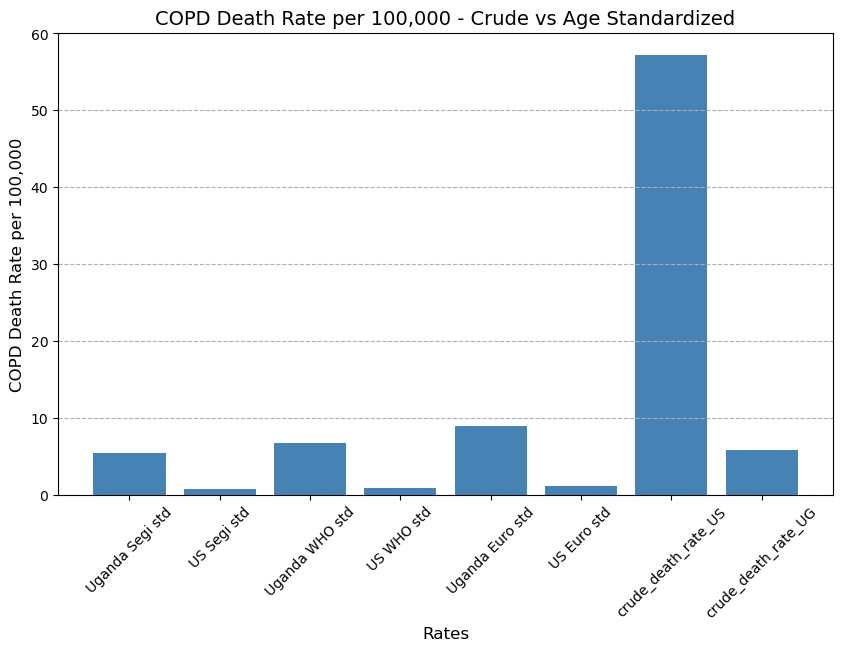

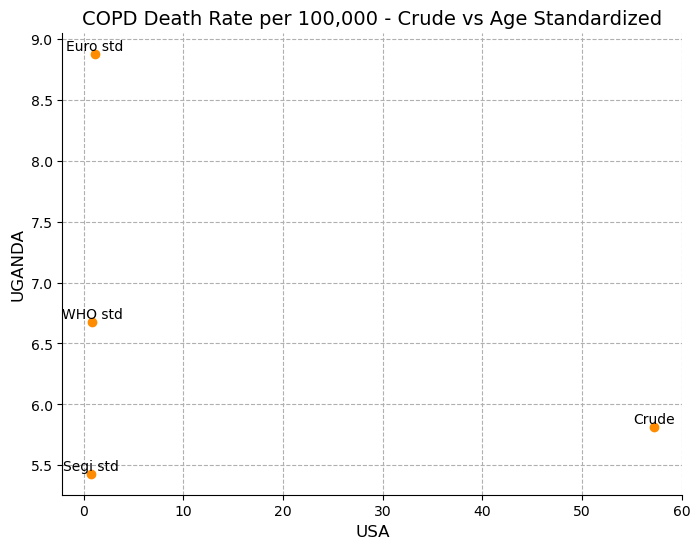

In [260]:
# Plotting the rates - bar chart
# Design specifics made with Co-pilot
rates = [UG_segi_std_death_rate, US_segi_std_death_rate, UG_who_std_death_rate, US_who_std_death_rate, UG_euro_std_death_rate, US_euro_std_death_rate, crude_death_rate_US, crude_death_rate_UG]
labels_bar = ['Uganda Segi std', 'US Segi std', 'Uganda WHO std', 'US WHO std', 'Uganda Euro std', 'US Euro std', 'crude_death_rate_US', 'crude_death_rate_UG']

# Customize the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels_bar, rates, color='steelblue')
plt.xlabel('Rates', fontsize=12)
plt.ylabel('COPD Death Rate per 100,000', fontsize=12)
plt.title('COPD Death Rate per 100,000 - Crude vs Age Standardized', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.show()

# Plotting the rates - scatter plot
labels_scatter = ['Segi std', 'WHO std', 'Euro std', 'Crude']

us_rates = [US_segi_std_death_rate, US_who_std_death_rate, US_euro_std_death_rate, crude_death_rate_US]
uganda_rates = [UG_segi_std_death_rate, UG_who_std_death_rate, UG_euro_std_death_rate, crude_death_rate_UG]

# Customize the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(us_rates, uganda_rates, color='darkorange')
plt.xlabel('USA', fontsize=12)
plt.ylabel('UGANDA', fontsize=12)
plt.title('COPD Death Rate per 100,000 - Crude vs Age Standardized', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels at each point
for i, label in enumerate(labels_scatter):
    plt.text(us_rates[i], uganda_rates[i], label, fontsize=10, ha='center', va='bottom')

plt.show()
